<a href="https://colab.research.google.com/github/SheripallyAditya/DataSCienceapps/blob/main/WhatsappAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import regex as re
import pandas as pd
import numpy as np
!pip install emoji
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
% matplotlib inline

In [11]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [12]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [13]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [14]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversation = 'WhatsApp Chat with Paddathi gala grp.txt'

with open(conversation, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

In [15]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])
df.tail(20)

,Date,Time,Author,Message
1589,2021-04-15,23:13,Mohan Classmate,Morris on fire
1590,2021-04-16,07:27,Lokesh Classmate,Ivala improvement rastunnara
1591,2021-04-16,07:27,Lokesh Classmate,Evaraina
1592,2021-04-16,07:32,+91 84639 42684,Cse 408 aa
1593,2021-04-16,07:32,Lokesh Classmate,Haa
1594,2021-04-16,07:33,Vikram,✋✋
1595,2021-04-16,07:38,+91 79899 56999,Me
1596,2021-04-16,07:59,+91 93813 85360,Improvement afternoon aa?
1597,2021-04-16,08:00,+91 79899 56999,3 to 430
1598,2021-04-16,08:00,+91 93813 85360,Ok


In [16]:
df.Author.unique()

array([None, 'Dubasi Gautham@lpu@ Classmate', 'Anand Classmate',
       '+91 79899 56999', 'Lokesh Classmate', 'Santosh Classmate',
       '+91 84639 42684', '+91 6303 265 960', 'Vishal (NS Frnd)',
       'Shiva @ Lpu@1st_year', 'Nitish Class Mate', '+91 93813 85360',
       '+91 87902 42342', 'Vikram', 'Mohan Classmate', 'Adith♥️🔥',
       '+91 6303 483 451', 'Abilash', 'Mahender Classmate',
       '+91 99669 89665'], dtype=object)

In [18]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
total_messages=df['Message'].count()
print(media_messages)
def split_count(text):

    emoji_list = []
    data = re.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
print(emojis)
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)
print("Padatigala group")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

155
0
Padatigala group
Messages: 1609
Media: 155
Emojis: 0
Links: 9


In [19]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df.info()
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["Adith♥️🔥", "Nitish Class Mate", "Anand Classmate"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)   
  print()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 0 to 1608
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1454 non-null   datetime64[ns]
 1   Time      1454 non-null   object        
 2   Author    1442 non-null   object        
 3   Message   1454 non-null   object        
 4   emoji     1454 non-null   object        
 5   urlcount  1454 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 79.5+ KB
Stats of Adith♥️🔥 -
Messages Sent 73
Words per message 3.0821917808219177
Media Messages Sent 4
Emojis Sent 0
Links Sent 0

Stats of Nitish Class Mate -
Messages Sent 148
Words per message 2.439189189189189
Media Messages Sent 11
Emojis Sent 0
Links Sent 0

Stats of Anand Classmate -
Messages Sent 53
Words per message 3.811320754716981
Media Messages Sent 58
Emojis Sent 0
Links Sent 0



In [20]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

There are 33429 words in all the messages.


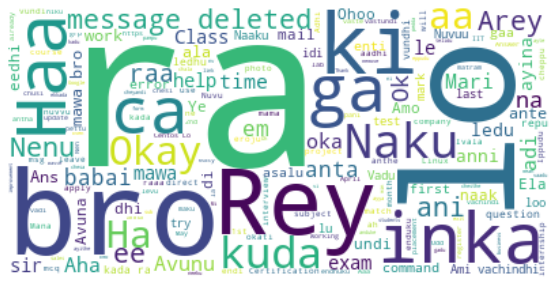

In [21]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Adith♥️🔥


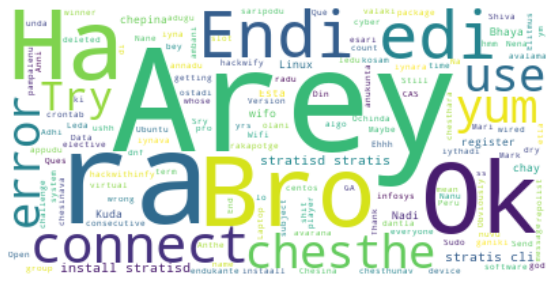

Author name Nitish Class Mate


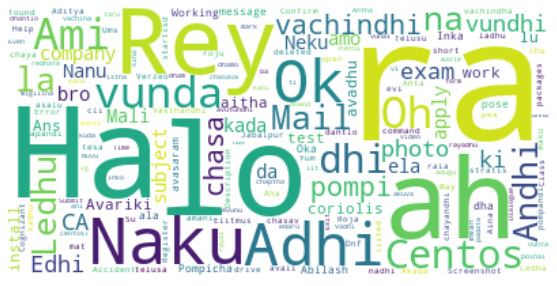

Author name Anand Classmate


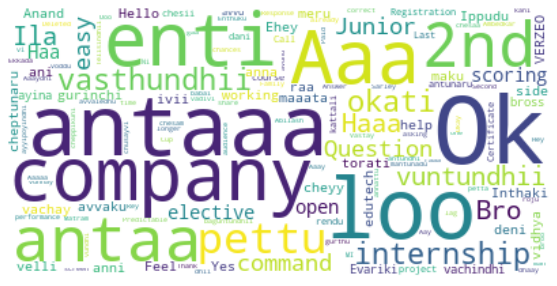

Author name Shiva @ Lpu@1st_year


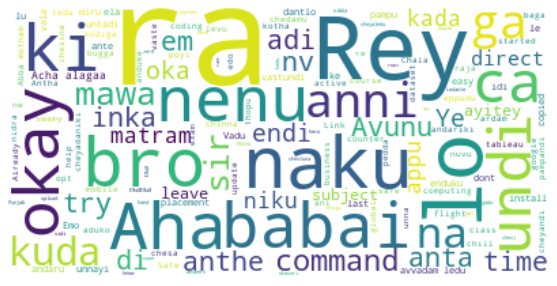

In [22]:
l = ["Adith♥️🔥", "Nitish Class Mate", "Anand Classmate","Shiva @ Lpu@1st_year"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()